In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil
import pickle
import glob

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore'
]
train = train.drop(columns=feats_to_drop)

In [5]:
train = TabularDataset(train)

# Training

In [6]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=train,
    time_limit=3600 * 11,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    save_space=False,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
    feature_prune_kwargs={"force_prune": True}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240525_090442"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 39600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240525_090442/ds_sub_fit/sub_fit_ho.
2024-05-25 09:04:43,652	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[13]	valid_set's l2: 0.00102223	valid_set's r2: -81.3183
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 8. Best iteration is:
	[8]	valid_set's l2: 0.0011238	valid_set's r2: -81.3948
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6. Best iteration is:
	[6]	valid_set's l2: 0.00163811	valid_set's r2: -82.1365
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 2. Best iter

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[5]	valid_set's l2: 0.0017003	valid_set's r2: -81.4418
	Ran out of time, early stopping on iteration 6. Best iteration is:
	[5]	valid_set's l2: 0.0017091	valid_set's r2: -81.0112
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[5]	valid_set's l2: 0.00169883	valid_set's r2: -81.4939
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00230018	valid_set's r2: -89.544
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238567	valid_set's r2: -90.7668
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early st

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 16.
	Ran out of time, early stopping on iteration 19.
	Ran out of time, early stopping on iteration 22.
	Ran out of time, early stopping on iteration 23.
	Ran out of time, early stopping on iteration 24.
	Ran out of time, early stopping on iteration 25.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 32.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.7675	 = Validation score   (r2)
	83.37s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 92.72s of the 9561.46s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-package

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 92.72s of the 9452.08s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.00165044	valid_set's r2: -81.4539
	Ran out of time, early 

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238053	valid_set's r2: -92.1765
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00229596	valid_set's r2: -90.3877
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00238066	valid_set's r2: -92.1765
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00256815	valid_set's r2: -94.5587
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning LightGBMXT_BAG_L2... Skipping this model.
Hyperparameter tu

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237531	valid_set's r2: -91.1892
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00229043	valid_set's r2: -89.8913
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237564	valid_set's r2: -91.1892
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.0025675	valid_set's r2: -94.5587
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning LightGBM_BAG_L2... Skipping this model.
Hyperparameter tunin

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 13.
	Ran out of time, early stopping on iteration 14.
	Ran out of time, early stopping on iteration 17.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.2967	 = Validation score   (r2)
	67.75s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 76.07s of the 4878.29s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/aut

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 76.07s of the 4767.54s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00246177	valid_set's r2: -94.4817
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 76.07s of the 4750.87s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with Sequent

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 73. Best iteration is:
	[62]	valid_set's l2: 0.00036702	valid_set's r2: -80.6802
	Ran out of time, early stopping on iteration 75. Best iteration is:
	[75]	valid_set's l2: 0.000360648	valid_set's r2: -81.0493
	Ran out of time, early stopping on iteration 79. Best iteration is:
	[79]	valid_set's l2: 0.000357082	valid_set's r2: -80.9792
	Ran out of time, early stopping on iteration 82. Best iteration is:
	[78]	valid_set's l2: 0.000360722	valid_set's r2: -81.2436
	Ran out of time, early stopping on iteration 87. Best iteration is:
	[84]	valid_set's l2: 0.000360614	valid_set's r2: -81.4329
	Ran out of time, early stopping on iteration 91. Best iteration is:
	[91]	valid_set's l2: 0.000357067	valid_set's r2: -81.6362
	Ran out of time, early stopping on iteration 100. Best iteration is:
	[100]	valid_set's l2: 0.000356708	valid_set's r2: -81.8362
	Ran out of tim

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	177.73s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 294.25s of the 30913.22s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 512, in validate_search_space
    raise EmptySearchSpace
autogluon.core.hpo.exceptions.EmptySearchSpace

During handling of the above exception, ano

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 77.
	Ran out of time, early stopping on iteration 79.
	Ran out of time, early stopping on iteration 82.
	Ran out of time, early stopping on iteration 86.
	Ran out of time, early stopping on iteration 89.
	Ran out of time, early stopping on iteration 95.
	Ran out of time, early stopping on iteration 107.
	Ran out of time, early stopping on iteration 129.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8656	 = Validation score   (r2)
	276.82s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 294.25s of the 30576.95s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.867	 = Validation score   (r2)
	30

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8399	 = Validation score   (r2)
	279.93s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 294.25s of the 29988.37s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 45. Best iteration is:
	[21]	valid_set's l2: 0.000976954	valid_set's r2: -80.6808
	0.6213	 = Validation score   (r2)
	250.3s	 = Training   runtime
	2.23s	 = Validation runtime
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model for up to 294.25s of the 29733.73s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with Sequent

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 21. Best iteration is:
	[21]	valid_set's l2: 0.000619151	valid_set's r2: -81.3327
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[13]	valid_set's l2: 0.000699166	valid_set's r2: -81.3411
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.00125974	valid_set's r2: -81.559
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4. Best iteration is:
	[1]	valid_set's l2: 0.00257388	valid_set's r2: -94.5072
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best i

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 15. Best iteration is:
	[13]	valid_set's l2: 0.000937422	valid_set's r2: -81.3317
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.000953271	valid_set's r2: -81.3553
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6. Best iteration is:
	[6]	valid_set's l2: 0.00156403	valid_set's r2: -81.5964
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Best iteration is:
	[1]	valid_set's l2: 0.0025733	valid_set's r2: -94.5072
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best ite

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 27.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 26.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 14.
	Ran out of time, early stopping on iteration 14.
	Ran out of time, early stopping on iteration 14.
	Ran out of time, early stopping on iteration 14.
	Ran out of t

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 240.02s of the 15254.7s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00181619	valid_set's r2: -83.2893
	Time limit exceeded...

In [7]:
X_train = train.drop('FloodProbability', axis=1)
y_train = train['FloodProbability']

y_preds = predictor.predict(X_train)

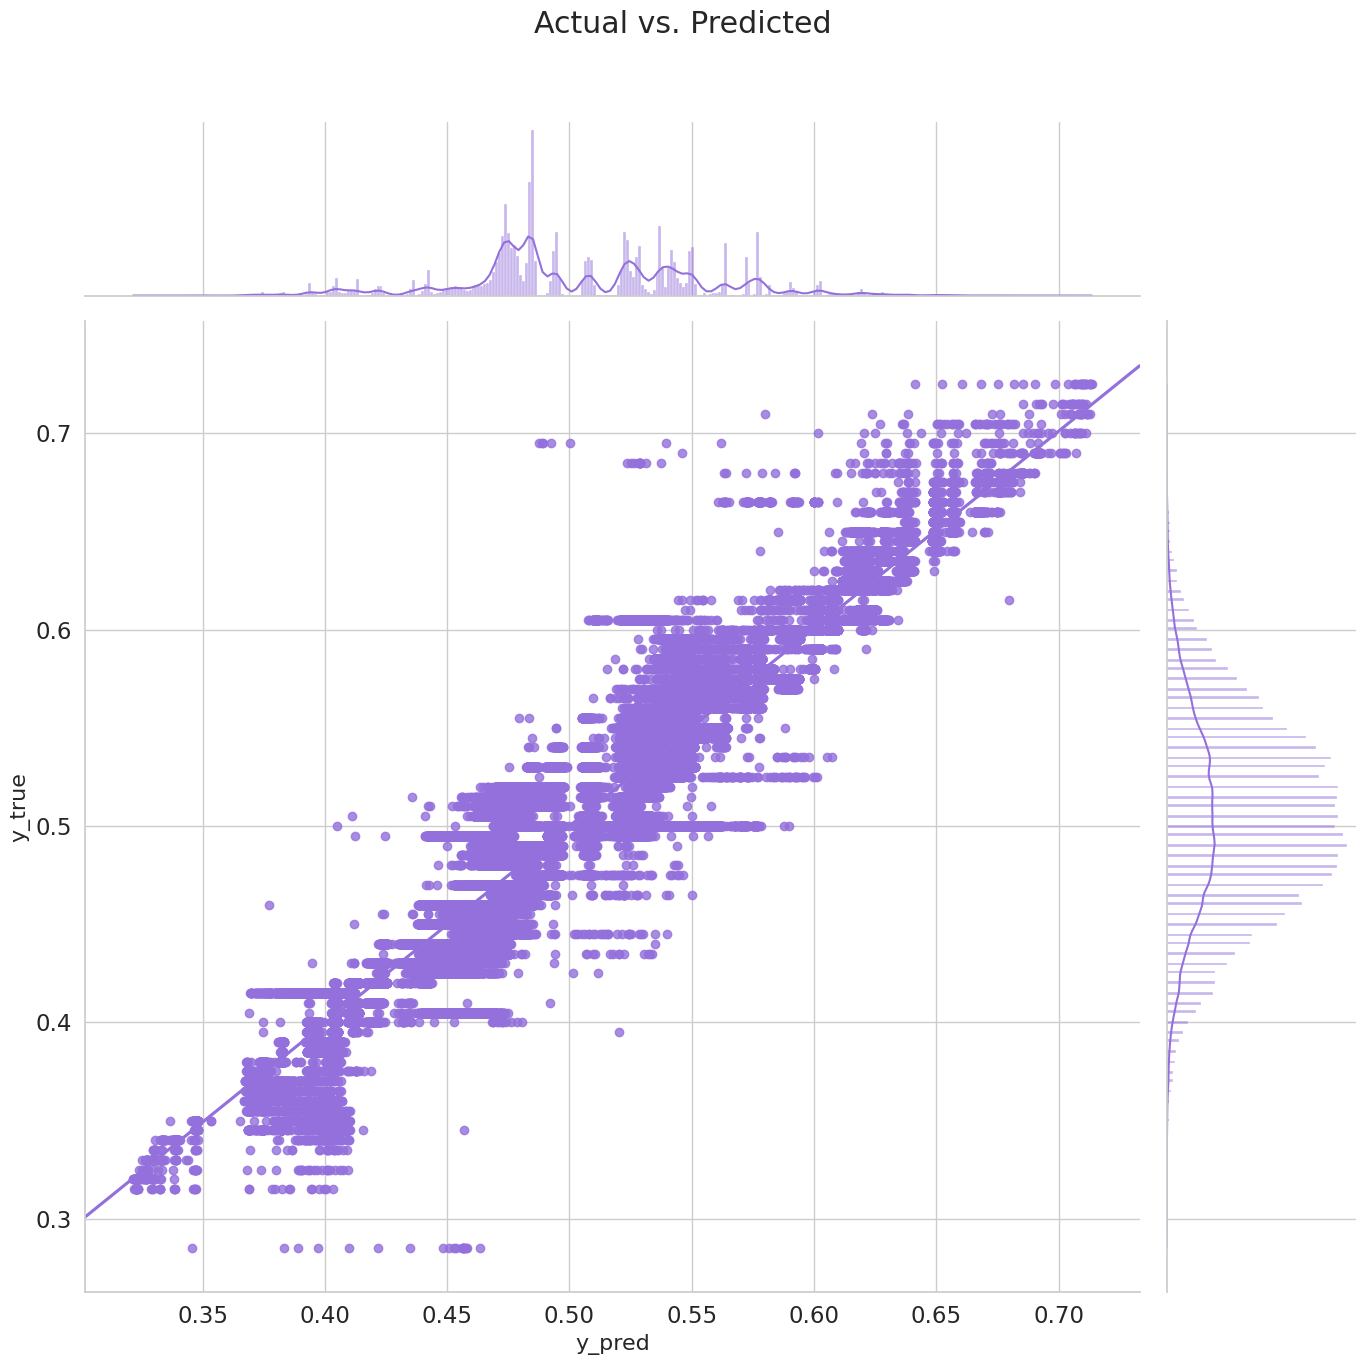

In [8]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

## Selected Features
I set `feature_prune_kwargs={"force_prune": True}` in the `fit` method. Here I'm printing out the features that AutoGluon selected, as well as those that it decided to dropped.

In [9]:
model_path = glob.glob("/kaggle/working/AutogluonModels/**/**/**/model.pkl")[0]
with open(model_path, 'rb') as f:
    model = pickle.load(f)

selected_features = model.features
unused_features = [col for col in train.columns if col not in selected_features and col != "FloodProbability"]

print("Unused Features:", unused_features)
print("\nSelected Features:", selected_features)

Unused Features: ['_sort_19', '_50th', '_cnt19', '_cnt22']

Selected Features: ['LightGBMXT_BAG_L1/T1', 'LightGBM_BAG_L1/T1', 'CatBoost_BAG_L1/T1', 'ExtraTreesMSE_BAG_L1', 'XGBoost_BAG_L1/T1', 'LightGBMLarge_BAG_L1', 'CatBoost_r177_BAG_L1', 'LightGBM_r131_BAG_L1', 'CatBoost_r9_BAG_L1', 'LightGBM_r96_BAG_L1', 'XGBoost_r33_BAG_L1', 'ExtraTrees_r42_BAG_L1', 'CatBoost_r137_BAG_L1', 'CatBoost_r13_BAG_L1', 'LightGBM_r188_BAG_L1', 'XGBoost_r89_BAG_L1', 'LightGBM_r130_BAG_L1', 'CatBoost_r50_BAG_L1', 'XGBoost_r194_BAG_L1', 'ExtraTrees_r172_BAG_L1', 'CatBoost_r69_BAG_L1', 'LightGBM_r161_BAG_L1', 'CatBoost_r70_BAG_L1', 'LightGBM_r196_BAG_L1', 'CatBoost_r167_BAG_L1', 'XGBoost_r98_BAG_L1', 'LightGBM_r15_BAG_L1', 'CatBoost_r86_BAG_L1', 'CatBoost_r49_BAG_L1', 'LightGBM_r143_BAG_L1', 'LightGBM_r94_BAG_L1', 'CatBoost_r128_BAG_L1', 'LightGBM_r30_BAG_L1', 'XGBoost_r49_BAG_L1', 'CatBoost_r5_BAG_L1', 'CatBoost_r143_BAG_L1', 'ExtraTrees_r178_BAG_L1', 'XGBoost_r31_BAG_L1', 'CatBoost_r60_BAG_L1', 'LightGBM_r1

# Making Predictions and Creating a Submission File

In [10]:
# Used for ensembling with other models
oof_predictions = predictor.get_oof_pred_proba()
with open('autogluon_oof_preds.pkl', 'wb') as f:
    pickle.dump(oof_predictions, f)

In [11]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [12]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv('autogluon.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.577891
1117958,1117958,0.454780
1117959,1117959,0.448049
1117960,1117960,0.466556
1117961,1117961,0.465968


In [13]:
shutil.rmtree("AutogluonModels")